# House Price Prediction
House price prediction is a problem in the real estate industry to make informed decisions. By using machine learning algorithms we can predict the price of a house based on various features such as location, size, number of bedrooms and other relevant factors. In this article we will explore how to build a machine learning model in Python to predict house prices to gain valuable insights into the housing market.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

In [3]:
!pip install xgboost

In [4]:
import xgboost as xgb

# Load the Dataset
we load the dataset and examine its basic structure including dimensions, column names, and data types. This helps us get an initial sense of the data we are working with

In [5]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [6]:
print(f"Training data shape: {train.shape}")
print(f"Test data shape: {test.shape}")

Training data shape: (1460, 81)
Test data shape: (1459, 80)


In [7]:
train.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [8]:
# checking data types and non-null counts
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Missing Value Analysis

In [9]:
total = train.isnull().sum()
percent = (total / len(train)) * 100
missing_df = pd.DataFrame({'Missing Count': total, 'Missing %': percent})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)
print(missing_df)

              Missing Count  Missing %
PoolQC                 1453  99.520548
MiscFeature            1406  96.301370
Alley                  1369  93.767123
Fence                  1179  80.753425
MasVnrType              872  59.726027
FireplaceQu             690  47.260274
LotFrontage             259  17.739726
GarageType               81   5.547945
GarageYrBlt              81   5.547945
GarageFinish             81   5.547945
GarageQual               81   5.547945
GarageCond               81   5.547945
BsmtFinType2             38   2.602740
BsmtExposure             38   2.602740
BsmtFinType1             37   2.534247
BsmtCond                 37   2.534247
BsmtQual                 37   2.534247
MasVnrArea                8   0.547945
Electrical                1   0.068493


## Missing Value Analysis – Interpretation

From the output, we can analyze:

- Features like `PoolQC`, `MiscFeature`, `Alley`, and `Fence` have more than **80-90% missing values**, so we may consider **dropping**`.
- Features such as `GarageType`, `BsmtQual`, `FireplaceQu` have **medium missing values**, which usually mean absence of that feature. We can **fill with `'None'`**.
- `LotFrontage` is numerical and has around **17% missing values** — we can fill it using **median LotFrontage by Neighborhood**.
- Features like `Electrical` or `KitchenQual` have very few missing values — they can be filled with **mode**.

This step helps decide how to clean or impute missing data before training any model.


In [10]:
# Drop features with excessive missing values (over ~80%)
high_missing_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
train.drop(columns=high_missing_cols, inplace=True)

# Replace missing values in categorical columns with 'None' 
fill_none_cats = ['FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
                  'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                  'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']
for col in fill_none_cats:
    train[col] = train[col].fillna("None")

# Replace missing numerical values with 0 
fill_zero_nums = ['GarageYrBlt', 'MasVnrArea']
for col in fill_zero_nums:
    train[col] = train[col].fillna(0)

# Fill LotFrontage using median value per Neighborhood
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(
    lambda val: val.fillna(val.median())
)

# Electrical had only one missing value — safely fill with most common category
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])


In [11]:
print("Remaining missing values in 'train':", train.isnull().sum().sum())

Remaining missing values in 'train': 0


# Exploratory Data Analysis (EDA)

## Check Target Variable Distribution (SalePrice)

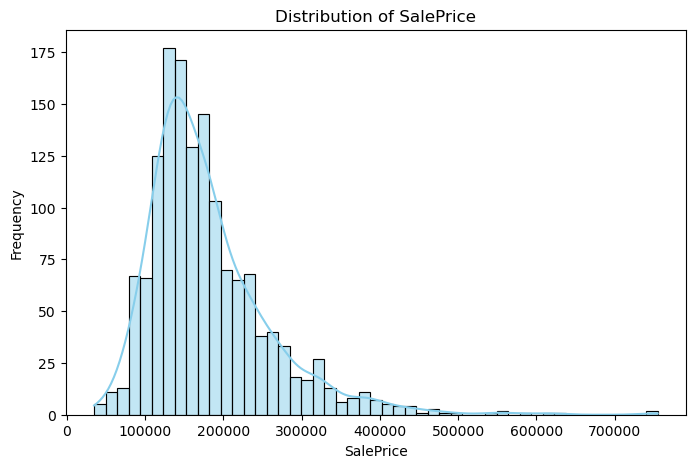

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(train['SalePrice'], kde=True, color='skyblue')
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

# Skewness and kurtosis
print("Skewness:", train['SalePrice'].skew())
print("Kurtosis:", train['SalePrice'].kurt())

## Correlation Matrix (Top Correlated Features)

Top 10 Features Correlated with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


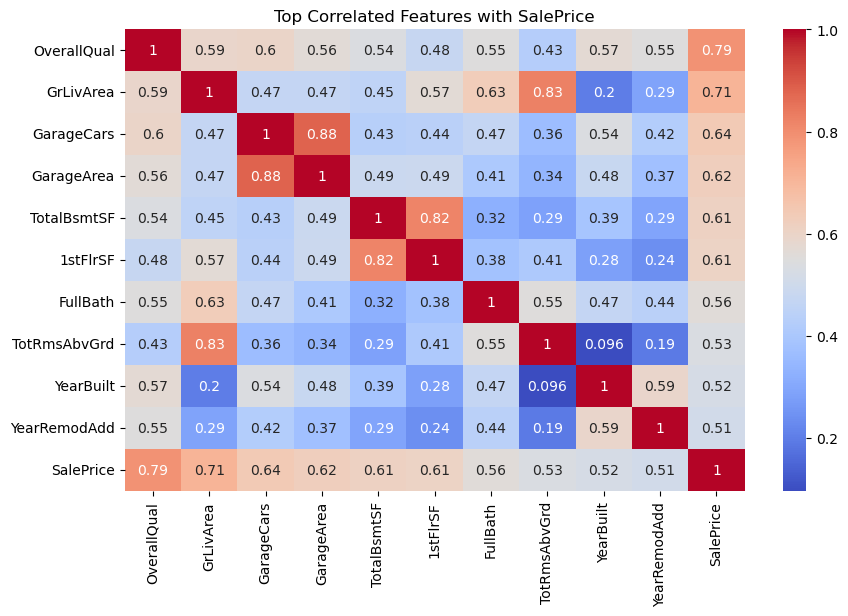

In [13]:
numeric_feats = train.select_dtypes(include=['int64', 'float64'])

corr = numeric_feats.corr()
top_corr = corr['SalePrice'].sort_values(ascending=False)[1:11]

print("Top 10 Features Correlated with SalePrice:")
print(top_corr)

# Visualize heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(train[top_corr.index.tolist() + ['SalePrice']].corr(), annot=True, cmap='coolwarm')
plt.title("Top Correlated Features with SalePrice")
plt.show()

## Relationship with Important Features

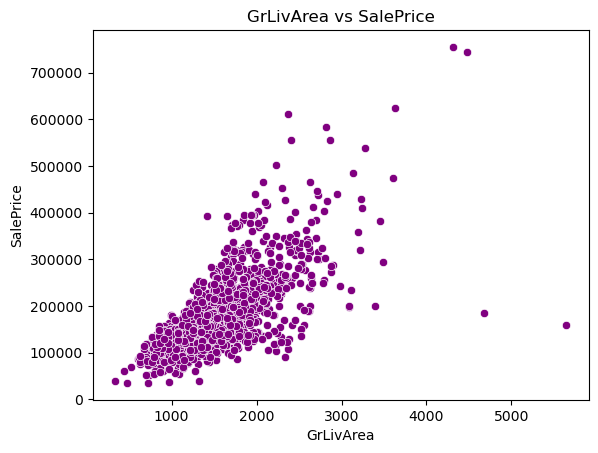

C:\Users\Asus\AppData\Local\Temp\ipykernel_14068\1246398749.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='OverallQual', y='SalePrice', data=train, palette='Blues')


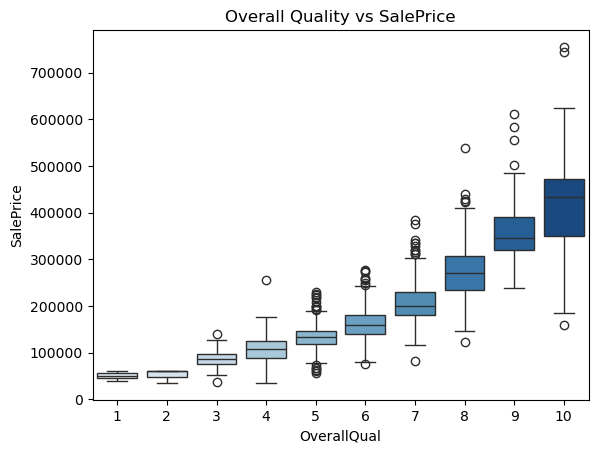

In [14]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train, color='purple')
plt.title('GrLivArea vs SalePrice')
plt.show()

# Boxplot: OverallQual vs SalePrice
sns.boxplot(x='OverallQual', y='SalePrice', data=train, palette='Blues')
plt.title('Overall Quality vs SalePrice')
plt.show()

## Categorical Feature Impact

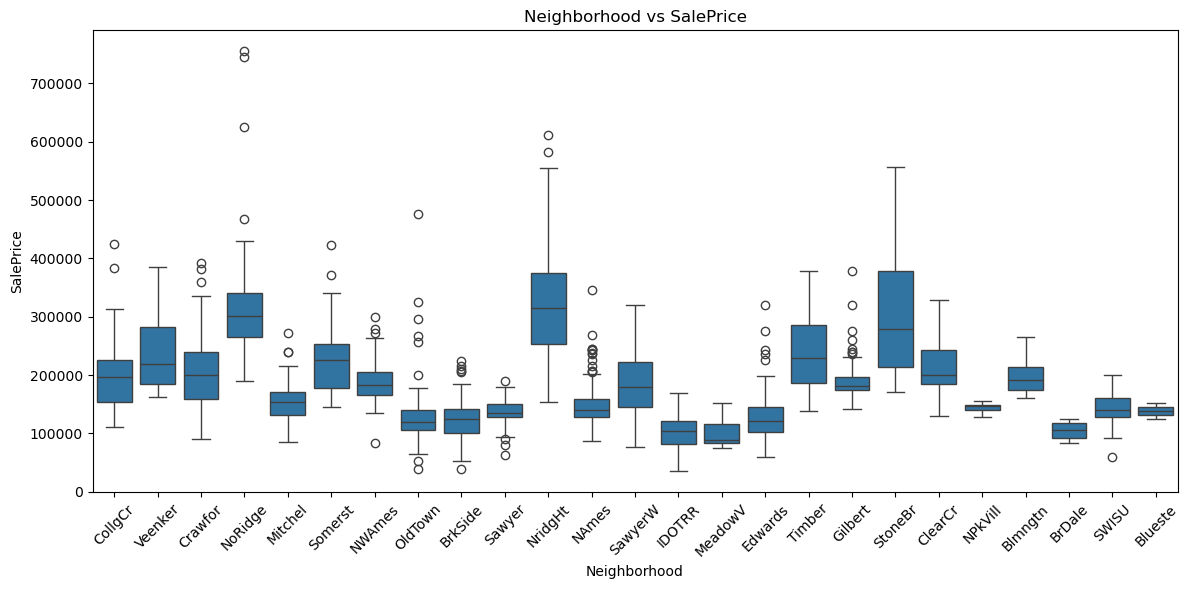

In [15]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train)
plt.xticks(rotation=45)
plt.title("Neighborhood vs SalePrice")
plt.show()

## Exploratory Data Analysis Summary

- `SalePrice` is **right-skewed**, so log transformation may help later.
- Features like `OverallQual`, `GrLivArea`, `GarageCars`, and `TotalBsmtSF` have **strong correlation** with the sale price.
- Higher `OverallQual` significantly increases the sale price.
- Houses in certain neighborhoods (e.g., `NridgHt`, `StoneBr`) tend to be priced higher than others.
- Some outliers (e.g., very large `GrLivArea` but low price) may need to be removed for better model performance.


# Feature Transformation & Encoding

In [16]:
train['SalePrice'] = np.log1p(train['SalePrice'])  # log(1 + SalePrice)

In [17]:
from scipy.stats import skew

# Select numeric features
numeric_feats = train.select_dtypes(include=[np.number])
# Exclude SalePrice
numeric_feats = numeric_feats.drop('SalePrice', axis=1)
# Compute skewness
skewed_feats = numeric_feats.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
# Pick features with skew > 0.75
high_skew = skewed_feats[skewed_feats > 0.75].index
# Apply log1p
train[high_skew] = np.log1p(train[high_skew])


In [18]:
# One-hot encode categorical variables
train = pd.get_dummies(train)

- Log-transformed the target variable (`SalePrice`) to reduce skewness and make its distribution more normal.
- Detected highly skewed numerical features and applied `log1p` transformation to reduce model bias.
- Applied **One-Hot Encoding** to categorical features so all data is numerical.
- After this step, our dataset is ready for feature selection and model training.

# Model Training and Evaluation

In [19]:
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

models_to_test = {
    "LinearRegression": LinearRegression(),
    "RidgeRegression": Ridge(alpha=1.0),
    "LassoRegression": Lasso(alpha=0.01),
    "RandomForest": RandomForestRegressor(n_estimators=150, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=150, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=150, learning_rate=0.1, random_state=42)
}

# Train each model and evaluate
model_scores = {}

for model_name, model in models_to_test.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    r2 = r2_score(y_val, preds)
    
    model_scores[model_name] = {
        "RMSE": round(rmse, 4),
        "R² Score": round(r2, 4)
    }

results_df = pd.DataFrame(model_scores).T.sort_values("RMSE")
print("Model Evaluation Results:")
print(results_df)


Model Evaluation Results:
                    RMSE  R² Score
RidgeRegression   0.1237    0.9179
LinearRegression  0.1253    0.9159
GradientBoosting  0.1328    0.9055
XGBoost           0.1417    0.8923
RandomForest      0.1452    0.8869
LassoRegression   0.1638    0.8562


# Visualize Model Scores (RMSE and R²)

C:\Users\Asus\AppData\Local\Temp\ipykernel_14068\1881500642.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=results_df_reset, palette="viridis")


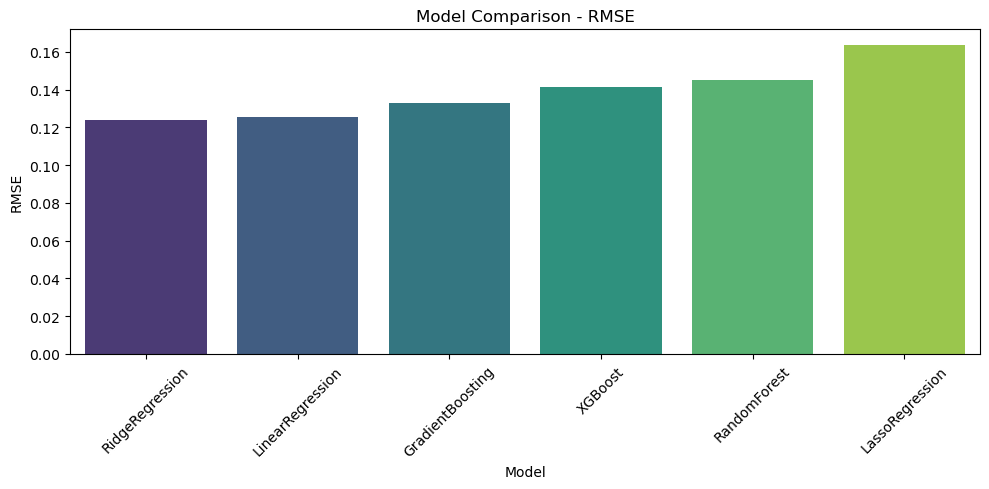

C:\Users\Asus\AppData\Local\Temp\ipykernel_14068\1881500642.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R² Score', data=results_df_reset, palette="magma")


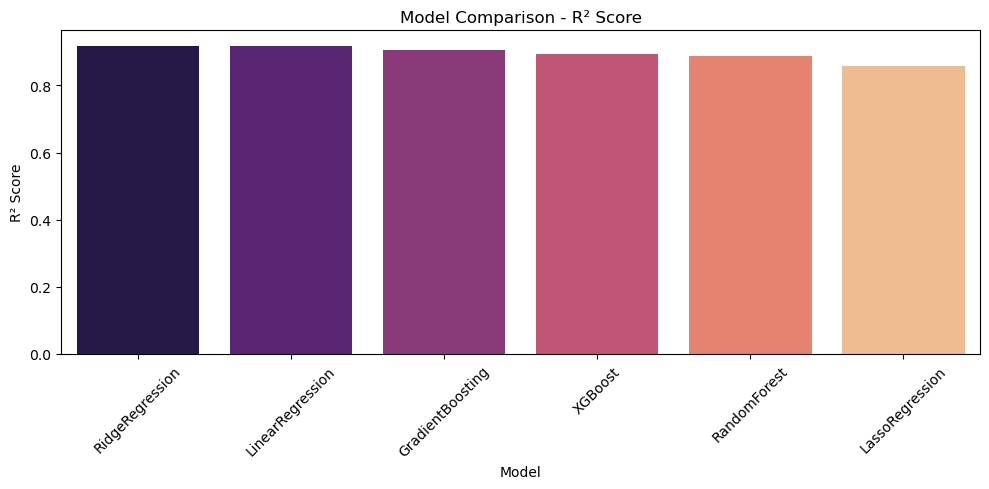

In [22]:
results_df_reset = results_df.reset_index().rename(columns={'index': 'Model'})
# Plot RMSE
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='RMSE', data=results_df_reset, palette="viridis")
plt.title('Model Comparison - RMSE')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Plot R² Score
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='R² Score', data=results_df_reset, palette="magma")
plt.title('Model Comparison - R² Score')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 # Final Prediction using Ridge Regression
In this step, we use the Ridge Regression model — which gave the lowest RMSE and highest R² score on the validation set — to predict house prices on the test dataset. The predictions are then inverse-transformed from log scale and saved into a CSV file for submission.

In [24]:
# Check for any remaining NaNs in final test features
print("Missing values before prediction:", X_test_final.isnull().sum().sum())
# Fill remaining NaNs with 0
X_test_final = X_test_final.fillna(0)

Missing values before prediction: 10


In [26]:
X_test_final = X_test_final.fillna(0)
test_preds_log = best_model.predict(X_test_final)
test_preds = np.expm1(test_preds_log)  # Reverse the log1p transformation

# Create submission file
prediction = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': test_preds
})
prediction.to_csv("prediction.csv", index=False)
print("Final prediction saved")

Final prediction saved


## Model Evaluation Summary

We tested 5 regression models using the training data, evaluated by:

- **RMSE (Root Mean Squared Error):** Measures average prediction error (lower is better)
- **R² Score:** Represents how well the model explains the variance in SalePrice (closer to 1 is better)

### Key Observations:

- **Ridge Regression** gave the best performance overall with the lowest RMSE (0.1237) and the highest R² score (0.9179), indicating a great fit to the data.
- **Linear Regression** was very close to Ridge, showing that regularization helped slightly.
- **Gradient Boosting** also performed well, slightly behind the linear models.
- **Random Forest** and **Lasso Regression** showed lower performance, likely due to overfitting or underfitting.

Based on this, **Ridge Regression** is our best choice for making predictions on unseen data.


## Conclusion & Insights

After performing thorough data cleaning, feature engineering, and model evaluation on the Ames Housing dataset, here are the key takeaways:

- **Data Preprocessing** played a vital role. Handling missing values thoughtfully (based on domain knowledge, like filling `LotFrontage` by median per neighborhood) helped maintain data integrity.
- **Feature Encoding** was essential for converting categorical variables into numerical format using one-hot encoding, enabling models to learn effectively.
- **Exploratory Data Analysis (EDA)** revealed strong correlations of variables like `OverallQual`, `GrLivArea`, and `TotalBsmtSF` with `SalePrice`.
- **Model Evaluation** showed that:
- **Ridge Regression** provided the **best balance of bias-variance tradeoff**, achieving the lowest RMSE and highest R² score on the validation set.
- **XGBoost** and **Gradient Boosting** performed very well and are great for capturing non-linear relationships.
- **Linear and Lasso Regression** worked reasonably well but underperformed compared to Ridge and boosting models.

---

### Final Insights:

- **Ridge Regression** was selected for the final prediction due to its consistent and robust performance on the validation set.
- With proper preprocessing and model selection, the Kaggle House Prices challenge can be solved with high accuracy using classic machine learning techniques.
- Future improvements could include:
  - Feature selection techniques (e.g., Recursive Feature Elimination)
  - Hyperparameter tuning (GridSearchCV / Optuna)
  - Ensembling top models (Ridge + XGBoost)
